# COMP 4030 - Predict H1N1 and Seasonal Flu Vaccines

In this notebook we aim to show the data science steps we have learnt to create and compare our final machine learning models, including:

- Data Description
- Data Pre Processing and Wrangling
- Exploratory Data Analysis
- Classification

Each cell will be labelled with who is responsible as we show off our different techniques.
 

In [38]:
#Importing required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib qt
%matplotlib inline

# Questions 

## The Questions we aim to answer are:

- How do levels of concern and knowledge about the H1N1 flu influence the likelihood of receiving the H1N1 vaccine?

- How do different behavioural factors, such as avoidance of close contact or reduced time at large gatherings, relate to the likelihood of receiving the H1N1 and seasonal flu vaccines?

- Does the perceived effectiveness and risk of getting the H1N1 and seasonal flu vaccines impact an individual's likelihood of getting vaccinated?

In [39]:
#Load dataframes - Ibrahim
df = pd.read_csv('data/FluShot_TrainingFeatures.csv')
t_labels = pd.read_csv('data/FluShot_TrainingLabels.csv')
test_features = pd.read_csv('data/FluShot_TestFeatures.csv')

df.describe()
t_labels.describe()
test_features.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26708.000000,26623.000000,26586.000000,26629.000000,26495.000000,26689.000000,26668.000000,26636.000000,26626.000000,26580.000000,...,25919.000000,14480.000000,26310.000000,26328.000000,26333.000000,26256.000000,26209.000000,26187.000000,26483.000000,26483.000000
mean,40060.500000,1.623145,1.266042,0.049645,0.729798,0.069279,0.826084,0.351517,0.337227,0.683747,...,0.111501,0.887914,3.844622,2.326838,2.360612,4.024832,2.708688,2.143392,0.894310,0.543745
std,7710.079831,0.902755,0.615617,0.217215,0.444072,0.253934,0.379045,0.477453,0.472772,0.465022,...,0.314758,0.315483,1.007570,1.275636,1.359413,1.083204,1.376045,1.339102,0.754244,0.935057
min,26707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,33383.750000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,40060.500000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,46737.250000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,53414.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


# Data Description 

Here we provide graphs giving a summary of the data in regards to each question 

# Question 1 - How do levels of concern and knowledge about the H1N1 flu influence the likelihood of receiving the H1N1 vaccine?


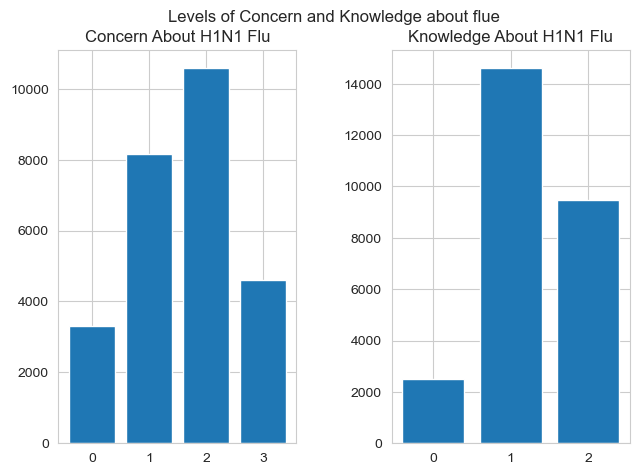

In [40]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Levels of Concern and Knowledge about flue')

plt.tight_layout()

axs[0].set_title('Concern About H1N1 Flu')
axs[1].set_title('Knowledge About H1N1 Flu')

# Get the count for behavioral_avoidance
concern_c = df['h1n1_concern'].value_counts()
axs[0].bar(concern_c.index, concern_c.values)

# Get the count for behavioral_large_gatherings
knowledge_c = df['h1n1_knowledge'].value_counts()
axs[1].bar(knowledge_c.index, knowledge_c.values)

plt.subplots_adjust(wspace=0.4)

# Question 2 -  How do different behavioural factors, such as avoidance of close contact or reduced time at large gatherings, relate to the likelihood of receiving the H1N1 and seasonal flu vaccines?

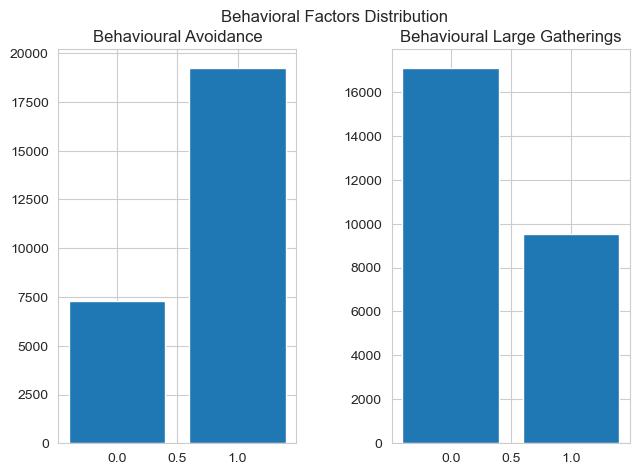

In [41]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Behavioral Factors Distribution')

plt.tight_layout()

# Get the count for behavioral_avoidance
avoidance_count = df['behavioral_avoidance'].value_counts()
axs[0].set_title('Behavioural Avoidance')
axs[0].bar(avoidance_count.index, avoidance_count.values)

# Get the count for behavioral_large_gatherings
large_gathering_count = df['behavioral_large_gatherings'].value_counts()
axs[1].set_title('Behavioural Large Gatherings')
axs[1].bar(large_gathering_count.index, large_gathering_count.values)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(wspace=0.4)

plt.show()

# Question 3 - Does the perceived effectiveness and risk of getting the H1N1 and seasonal flu vaccines impact an individual's likelihood of getting vaccinated?

(26707, 38)


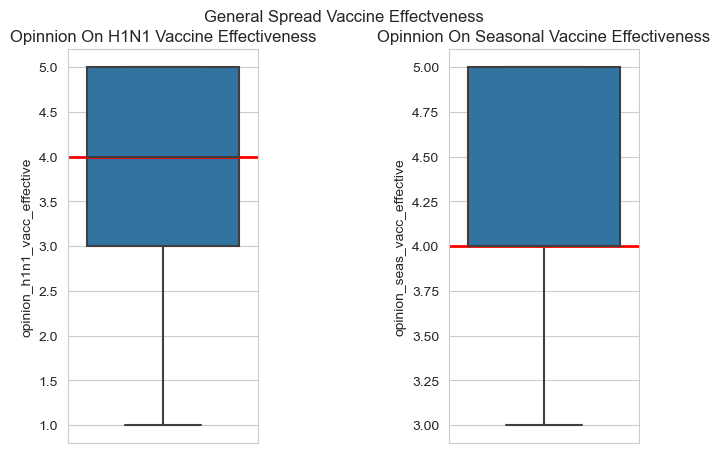

In [42]:
#Ibrahim

#Merege the dataframes together
merged = pd.merge(df, t_labels, on='respondent_id', how='inner')

print(merged.shape)


merged.columns

#Creating subplot to show boxplots
fig, axs = plt.subplots(1, 2)
fig.suptitle('General Spread Vaccine Effectveness')

plt.tight_layout()
#Set the titles
axs[0].set_title('Opinnion On H1N1 Vaccine Effectiveness')
axs[1].set_title('Opinnion On Seasonal Vaccine Effectiveness')

#Fill in the box plots using values regarding peoples opinions on each vaccines effectiveness
sns.boxplot(data=merged, y='opinion_h1n1_vacc_effective', ax = axs[0], showfliers=True)
median_val = merged['opinion_h1n1_vacc_effective'].median()
axs[0].axhline(median_val, color='red', linewidth=2)

sns.boxplot(data=merged, y='opinion_seas_vacc_effective', ax = axs[1],showfliers=False)
median_val2 = merged['opinion_seas_vacc_effective'].median()
axs[1].axhline(median_val2, color='red', linewidth=2,)

#Create enough space so plots do not overlap
plt.subplots_adjust(wspace=1, hspace=0.5)


# Data Pre Processing and Wrangling


In [43]:
#Ibrahim
df.columns 

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [44]:
#Ibrahim
t_labels.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [45]:
#We will look to intergrate the two dataframes we are given - Ibrahim
df = pd.merge(df, t_labels, on='respondent_id', how='inner')
df.columns.unique()


Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [46]:
#Checking to see if there are duplicates - Ibrahim
df[df.duplicated(keep=False)]
test_features[test_features.duplicated(keep = False)]

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation


In [47]:
#Next Looking for null values in the count - Ibrahim
#Looking for boundary visolations in the answers (binary values should be 1 or 0) 

print(df.describe())
print(test_features.describe())

       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000    26591.000000               26636.000000   
mean    13353.000000      1.618486        1.262532                   0.048844   
std      7709.791156      0.910311        0.618149                   0.215545   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6676.500000      1.000000        1.000000                   0.000000   
50%     13353.000000      2.000000        1.000000                   0.000000   
75%     20029.500000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0

In [48]:
#Want to explore catergories related to our questions - Ibrahim
#outliers, boundary violations, class imbalances, encoding, rename catergories

#concern , knowledge, avoidance, large gatherings, opinion_effectiveness, opinion_risk, age, education level

#Education
df['education'].unique()

# 'some college' and 'college graduate' are both forms of higher education so we will group them
df['education'] = df['education'].replace(['College Graduate', 'Some College'], 'Higher Education')

#We can make 12 or more years clearer
df['education'] = df['education'].replace(['12 Years'], '>= 12 years')

df['education'].unique()



#Education
test_features['education'].unique()

# 'some college' and 'college graduate' are both forms of higher education so we will group them
test_features['education'] = test_features['education'].replace(['College Graduate', 'Some College'], 'Higher Education')

#We can make 12 or more years clearer
test_features['education'] = test_features['education'].replace(['12 Years'], '>= 12 years')

test_features['education'].unique()



array(['Higher Education', '>= 12 years', '< 12 Years', nan], dtype=object)

## Data Imputation

We will both now attempt different imputation methods to use and compare results

Xiaonan will use simple mode/median imputation as we are mainly working with catergorical/binary variables.

Ibrahim will use hot deck imputation with an attempt to maintain patterns and trends within the data. 

### Median Imputation - Xiaonan

In [49]:
#Print all rows with missing values - Xiaonan
median_df = df.copy()

print(median_df[median_df.isna().any(axis=1)].shape)
median_df[median_df.isna().any(axis=1)]



median_df_t = test_features.copy()

print(median_df_t[median_df_t.isna().any(axis=1)].shape)
median_df_t[median_df_t.isna().any(axis=1)]

(20270, 38)
(20209, 36)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
6,26713,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,NaN,Married,Own,Not in Labor Force,fpwskwrf,"MSA, Not Principle City",1.0,0.0,NaN,NaN
7,26714,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Unemployed,oxchjgsf,"MSA, Not Principle City",1.0,0.0,NaN,NaN
8,26715,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,Married,Own,Not in Labor Force,oxchjgsf,"MSA, Not Principle City",1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26699,53406,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,qufhixun,Non-MSA,1.0,2.0,NaN,NaN
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [50]:
#Replace the missing values in each column with the median of each column - Xiaonan
numeric_columns = median_df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    median = median_df[column].median()
    median_df[column].fillna(median, inplace=True)
median_df

#Applying the same to test features
numeric_columns_t = median_df_t.select_dtypes(include=[np.number]).columns
for column in numeric_columns_t:
    median = median_df_t[column].median()
    median_df_t[column].fillna(median, inplace=True)
median_df_t



,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


### Random Hot Deck Imputation - Ibrahim

In [51]:
#First I will see what columns do not contain null values, I will pick my matching criteria from them 

null_counts = df.isna().sum()
print(null_counts)

#First we want to drop values that dont meet a threshold of 18 non null values, we do not eant to have to impute >50% of categorical values
df = df.dropna(thresh=18).copy()
print(df.shape)
#age, sex and race can be used as matching criteria



#Cleaning Test data too


null_counts_test = test_features.isna().sum()
print(null_counts_test)

#First we want to drop values that dont meet a threshold of 18 non null values, we do not eant to have to impute >50% of categorical values
test_features = test_features.dropna(thresh=18).copy()
print(test_features.shape)


respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [52]:
#Next we perform the hot deck imputation

#Copy original data set
df_hd_imputation = df.copy()

# Group records by matching criteria columns
groups = df_hd_imputation.groupby(['age_group', 'race', 'sex'])



# Loop through columns in dataset
for i in df_hd_imputation.columns:
    # Check if the column contains na values
    if df_hd_imputation[i].isna().any():
        # Iterate over missing values in the column
        for index, row in df_hd_imputation[df_hd_imputation[i].isna()].iterrows():
            # Get the matching group based on 'age_group', 'race', and 'sex'
            matching_group = groups.get_group((row['age_group'], row['race'], row['sex']))
            
            # Select a random record from the matching group
            matching_record = matching_group.sample(n=1)
            
            # Impute the missing value with the value from the matching record
            df_hd_imputation.loc[index, i] = matching_record[i].values[0]


# Check 
null_counts = df_hd_imputation.isna().sum()
print(null_counts)


respondent_id                     0
h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1                 87
doctor_recc_seasonal             99
chronic_med_condition            24
child_under_6_months             17
health_worker                    12
health_insurance               3856
opinion_h1n1_vacc_effective       2
opinion_h1n1_risk                 1
opinion_h1n1_sick_from_vacc       4
opinion_seas_vacc_effective       3
opinion_seas_risk                 6
opinion_seas_sick_from_vacc       3
age_group                         0
education                        52
race                              0
sex                               0
income_poverty                  452
marital_status              

In [53]:
#Hot deck imputation for the test data


#Copy original data set
test_imput = test_features.copy()

# Group records by matching criteria columns
groups_t = test_imput.groupby(['age_group', 'race', 'sex'])



# Loop through columns in dataset
for i in test_imput.columns:
    # Check if the column contains na values
    if test_imput[i].isna().any():
        # Iterate over missing values in the column
        for index, row in test_imput[test_imput[i].isna()].iterrows():
            # Get the matching group based on 'age_group', 'race', and 'sex'
            matching_group = groups_t.get_group((row['age_group'], row['race'], row['sex']))
            
            # Select a random record from the matching group
            matching_record = matching_group.sample(n=1)
            
            # Impute the missing value with the value from the matching record
            test_imput.loc[index, i] = matching_record[i].values[0]


# Check 
null_counts = test_imput.isna().sum()
print(null_counts)



respondent_id                     0
h1n1_concern                      0
h1n1_knowledge                    2
behavioral_antiviral_meds         0
behavioral_avoidance              3
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             1
doctor_recc_h1n1                 87
doctor_recc_seasonal             76
chronic_med_condition            10
child_under_6_months             16
health_worker                     2
health_insurance               3642
opinion_h1n1_vacc_effective       2
opinion_h1n1_risk                 3
opinion_h1n1_sick_from_vacc       1
opinion_seas_vacc_effective       0
opinion_seas_risk                 5
opinion_seas_sick_from_vacc       3
age_group                         0
education                        31
race                              0
sex                               0
income_poverty                  403
marital_status              

Acklowldeged there are still null values left over, this is a chance to use multiple imputation methods, I will use mode imputation


In [54]:
#Exploring the catergories with high null values

#Just assume an error so will apply another imputation method
print(df_hd_imputation['health_insurance'].unique())
print(df_hd_imputation['income_poverty'].unique())

#We will assume the nan means unemployement as there is no code for unemployment
print(df_hd_imputation['employment_industry'].unique())
print(df_hd_imputation['employment_occupation'].unique())



[ 1. nan  0.]
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]
[nan 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh' 'arjwrbjb'
 'ldnlellj' 'cfqqtusy' 'wlfvacwt' 'fcxhlnwr' 'nduyfdeo' 'vjjrobsf'
 'atmlpfrs' 'msuufmds' 'xqicxuve' 'mfikgejo' 'mcubkhph' 'phxvnwax'
 'dotnnunm' 'haxffmxo' 'qnlwzans']
[nan 'xgwztkwe' 'xtkaffoo' 'emcorrxb' 'vlluhbov' 'xqwwgdyp' 'ccgxvspp'
 'qxajmpny' 'kldqjyjy' 'haliazsg' 'mxkfnird' 'hodpvpew' 'hfxkjkmi'
 'bxpfxfdn' 'ukymxvdu' 'cmhcxjea' 'dlvbwzss' 'tfqavkke' 'uqqtjvyb'
 'oijqvulv' 'xzmlyyjv' 'rcertsgn' 'pvmttkik' 'dcjcmpih']


In [55]:
#filling nan values to unemployed

df_hd_imputation['employment_industry'].fillna('unemployed', inplace=True)
df_hd_imputation['employment_occupation'].fillna('unemployed', inplace=True)

test_imput['employment_industry'].fillna('unemployed', inplace=True)
test_imput['employment_occupation'].fillna('unemployed', inplace=True)

print(df_hd_imputation['employment_industry'].unique())
print(df_hd_imputation['employment_occupation'].unique())

['unemployed' 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh'
 'arjwrbjb' 'ldnlellj' 'cfqqtusy' 'wlfvacwt' 'fcxhlnwr' 'nduyfdeo'
 'vjjrobsf' 'atmlpfrs' 'msuufmds' 'xqicxuve' 'mfikgejo' 'mcubkhph'
 'phxvnwax' 'dotnnunm' 'haxffmxo' 'qnlwzans']
['unemployed' 'xgwztkwe' 'xtkaffoo' 'emcorrxb' 'vlluhbov' 'xqwwgdyp'
 'ccgxvspp' 'qxajmpny' 'kldqjyjy' 'haliazsg' 'mxkfnird' 'hodpvpew'
 'hfxkjkmi' 'bxpfxfdn' 'ukymxvdu' 'cmhcxjea' 'dlvbwzss' 'tfqavkke'
 'uqqtjvyb' 'oijqvulv' 'xzmlyyjv' 'rcertsgn' 'pvmttkik' 'dcjcmpih']


In [56]:
df_hd_imputation = df_hd_imputation.fillna(df_hd_imputation.mode().iloc[0])

test_imput = test_imput.fillna(test_imput.mode().iloc[0])

null_counts = df_hd_imputation.isna().sum()
print(null_counts)

print("Test values:")

null_counts_t = test_imput.isna().sum()
print(null_counts_t)

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [57]:
#Next we look to narrow the Data frame to consist of values we find relevant to the questions


narrow_df = df_hd_imputation[['h1n1_vaccine', 'seasonal_vaccine','h1n1_concern', 'h1n1_knowledge','behavioral_avoidance',
       'behavioral_large_gatherings','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'sex']]
print(narrow_df.shape)

narrow_test = test_imput[['h1n1_concern', 'h1n1_knowledge','behavioral_avoidance',
       'behavioral_large_gatherings','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'sex']]
print(narrow_df.shape)



(26664, 15)
(26664, 15)


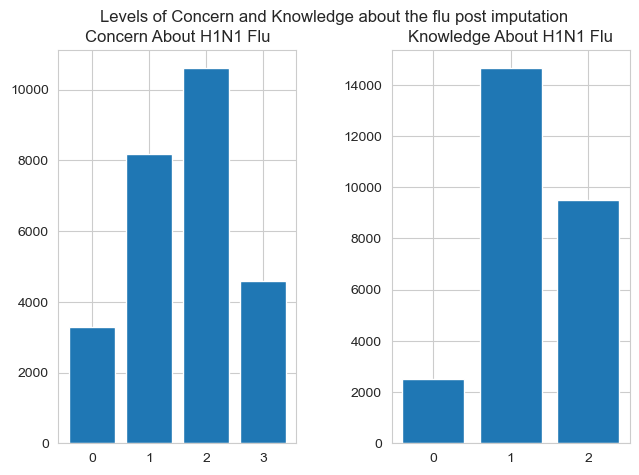

In [58]:
#After Imputatipn we want to compare if the distribution of variables were're working with have been skewed

fig, axs = plt.subplots(1, 2)
fig.suptitle('Levels of Concern and Knowledge about the flu post imputation')

plt.tight_layout()

axs[0].set_title('Concern About H1N1 Flu')
axs[1].set_title('Knowledge About H1N1 Flu')

# Get the count for behavioral_avoidance
concern_c = narrow_df['h1n1_concern'].value_counts()
axs[0].bar(concern_c.index, concern_c.values)

# Get the count for behavioral_large_gatherings
knowledge_c = narrow_df['h1n1_knowledge'].value_counts()
axs[1].bar(knowledge_c.index, knowledge_c.values)

plt.subplots_adjust(wspace=0.4)

#If we ccompare this figue with the above from the data description, the data shape still remains the same
#Could be due to a small number of null values needing imputationnn, therefore we will not investigae the rest

In [59]:
narrow_df = narrow_df.reset_index(drop=True)

narrow_df

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_large_gatherings,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex
0,0,0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,Female
1,0,1,3.0,2.0,1.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,>= 12 years,Male
2,0,0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,Higher Education,Male
3,0,1,1.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,>= 12 years,Female
4,0,0,2.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Higher Education,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,0,0,2.0,0.0,1.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Higher Education,Female
26660,0,0,1.0,2.0,1.0,0.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,Higher Education,Male
26661,0,1,2.0,2.0,1.0,1.0,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Higher Education,Female
26662,0,0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Higher Education,Female


In [60]:
#narrow_df.to_csv('cleaned_flushot_hdimputation.csv')

# Data Analysis

- How do levels of concern and knowledge about the H1N1 flu influence the likelihood of receiving the H1N1 vaccine?

- How do different behavioural factors, such as avoidance of close contact or reduced time at large gatherings, relate to the likelihood of receiving the H1N1 and seasonal flu vaccines?

- Does the perceived effectiveness and risk of getting the H1N1 and seasonal flu vaccines impact an individual's likelihood of getting vaccinated?

Next we wanted to explore the data further to try and vissualise possible relations or trends within the data with regards to our questions, as were're dealing with categorical/ binary variables it requires the use of bar plots (ordinary, grouped and stacked), pie charts and box or violin plots.

## Ibrahim's Analysis

In [61]:
dataframe = narrow_df.copy()
dataframe


,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_large_gatherings,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex
0,0,0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,Female
1,0,1,3.0,2.0,1.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,>= 12 years,Male
2,0,0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,Higher Education,Male
3,0,1,1.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,>= 12 years,Female
4,0,0,2.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Higher Education,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,0,0,2.0,0.0,1.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Higher Education,Female
26660,0,0,1.0,2.0,1.0,0.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,Higher Education,Male
26661,0,1,2.0,2.0,1.0,1.0,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Higher Education,Female
26662,0,0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Higher Education,Female


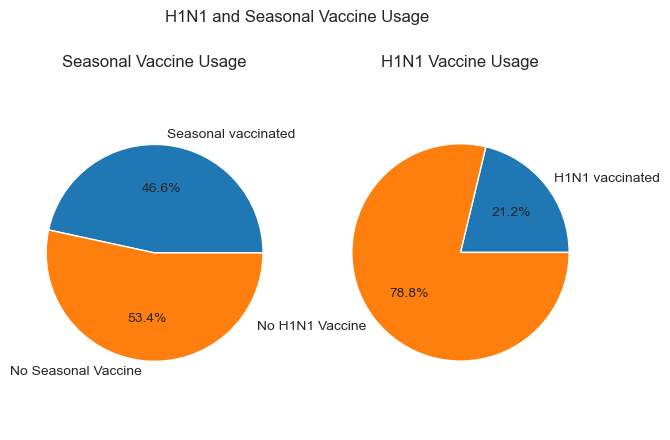

In [62]:
# Looking at the data frame as a whole

#Explore how many people actually recieved vaccnations

total = len(dataframe)

seas_sum = dataframe['seasonal_vaccine'].sum()
h1n1_sum = dataframe['h1n1_vaccine'].sum()

#Create Plots
fig, axs = plt.subplots(1, 2)
fig.suptitle('H1N1 and Seasonal Vaccine Usage')
fig.tight_layout(pad=2)

# Creating labels and arrays to place into pie chart
labels0 = ['Seasonal vaccinated', 'No Seasonal Vaccine']
sizes0 = [seas_sum, total-seas_sum]

labels1 = ['H1N1 vaccinated', 'No H1N1 Vaccine']
sizes1 = [h1n1_sum, total-h1n1_sum]

#Inserting data into pie charts and subplots
axs[0].pie(sizes0, labels=labels0, autopct='%1.1f%%')#Adjusts dp
axs[0].axis('equal') 
axs[0].set_title('Seasonal Vaccine Usage')

axs[1].pie(sizes1, labels=labels1, autopct='%1.1f%%')
axs[1].axis('equal')  
axs[1].set_title('H1N1 Vaccine Usage')


plt.show()


### Q1

I can see the h1n1 vaccine is taken less than the seasonal vaccine therefore I want to see if there are any relations with the concern or knowledge of h1n1 vaccine between it being taken.

I will use a grouped bar chart to try explore this

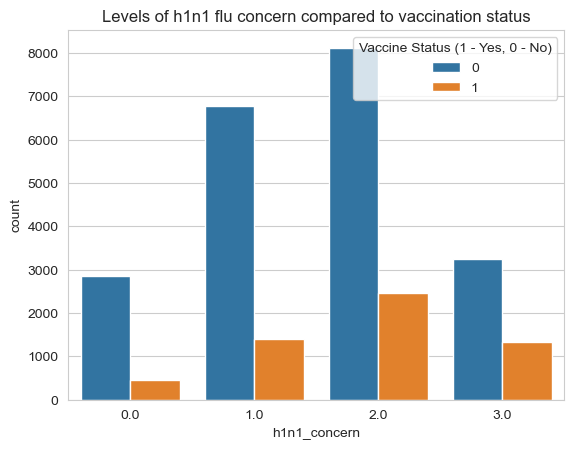

In [63]:
q1df = narrow_df.copy()
concern_df = q1df[['h1n1_vaccine', 'h1n1_concern']]

#First I reshape the dataframe into 2 groups with the size function to get the total people in each group
#count is used for the total number of records

grouped = concern_df.groupby(['h1n1_concern', 'h1n1_vaccine']).size().reset_index(name='count') 


sns.barplot(data=grouped, x='h1n1_concern', y='count', hue='h1n1_vaccine', ci='sd')

# Set the desired legend labels - unable to change the legend hndles so did not use
legend_labels = ['Not Vaccinated', 'Vaccinated']

# Create the legend with 1 and 0 explanation
plt.legend(title='Vaccine Status (1 - Yes, 0 - No)', loc=1)

plt.title('Levels of h1n1 flu concern compared to vaccination status')
plt.show()

#Proportion of vaccination increases with concern over the flu

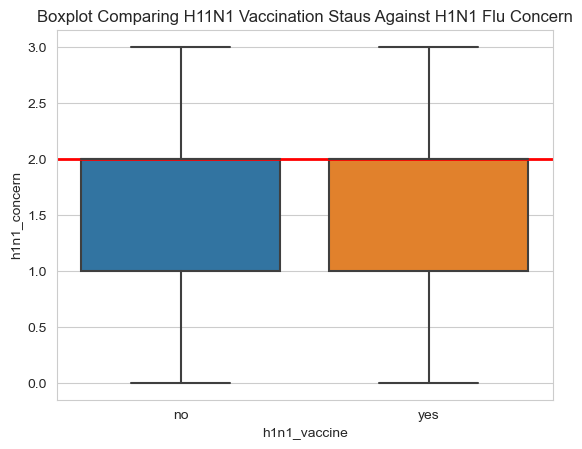

In [64]:
#Box plot comparing concern with different vaccination status

copydf = concern_df.copy()
copydf['h1n1_vaccine'] = copydf['h1n1_vaccine'].replace({1: 'yes', 0: 'no'})

sns.boxplot(data=copydf, y='h1n1_concern', x='h1n1_vaccine', showfliers=True)
median_val = merged['h1n1_concern'].median()
plt.title('Boxplot Comparing H11N1 Vaccination Staus Against H1N1 Flu Concern')
plt.axhline(median_val, color='red', linewidth=2)


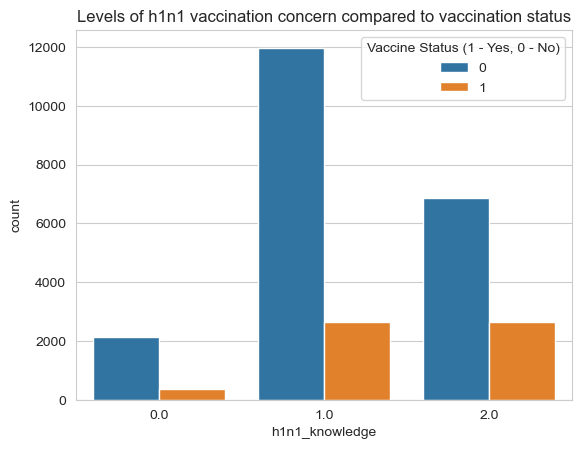

In [65]:
q1df 
knowledge_df = q1df[['h1n1_vaccine', 'h1n1_knowledge']]

#First I reshape the dataframe into 2 groups with the size function to get the total people in each group
#count is used for the total number of records

grouped2 = knowledge_df.groupby(['h1n1_vaccine', 'h1n1_knowledge']).size().reset_index(name='count') 


sns.barplot(data=grouped2, x='h1n1_knowledge', y='count', hue='h1n1_vaccine', ci='sd')

# Set the desired legend labels - unable to change the legend hndles so did not use
legend_labels = ['Not Vaccinated', 'Vaccinated']

# Create the legend explaning 1 and 0
plt.legend(title='Vaccine Status (1 - Yes, 0 - No)')

plt.title('Levels of h1n1 vaccination concern compared to vaccination status')
plt.show()

#Proportion of vaccination increases with knowledge

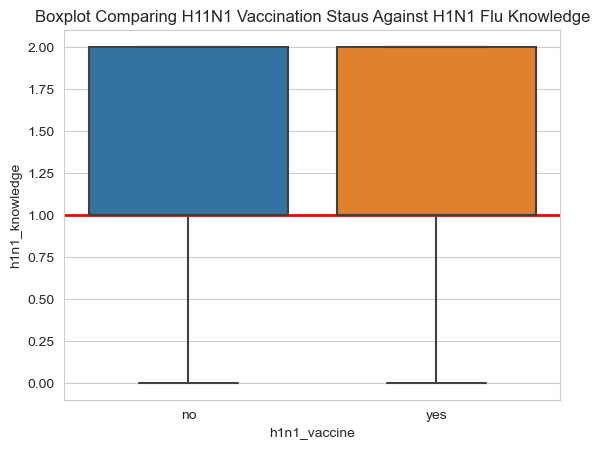

In [66]:
#Box plot comparing knowledge with different vaccination status

copydf2 = knowledge_df.copy()
copydf2['h1n1_vaccine'] = copydf2['h1n1_vaccine'].replace({1: 'yes', 0: 'no'})

sns.boxplot(data=copydf2, y='h1n1_knowledge', x='h1n1_vaccine', showfliers=True)
median_val = merged['h1n1_knowledge'].median()
plt.title('Boxplot Comparing H11N1 Vaccination Staus Against H1N1 Flu Knowledge')
plt.axhline(median_val, color='red', linewidth=2)



### Q2

Text(0.5, 1.0, "Comparing record's close contact with possible flu victims and vaccination rates")

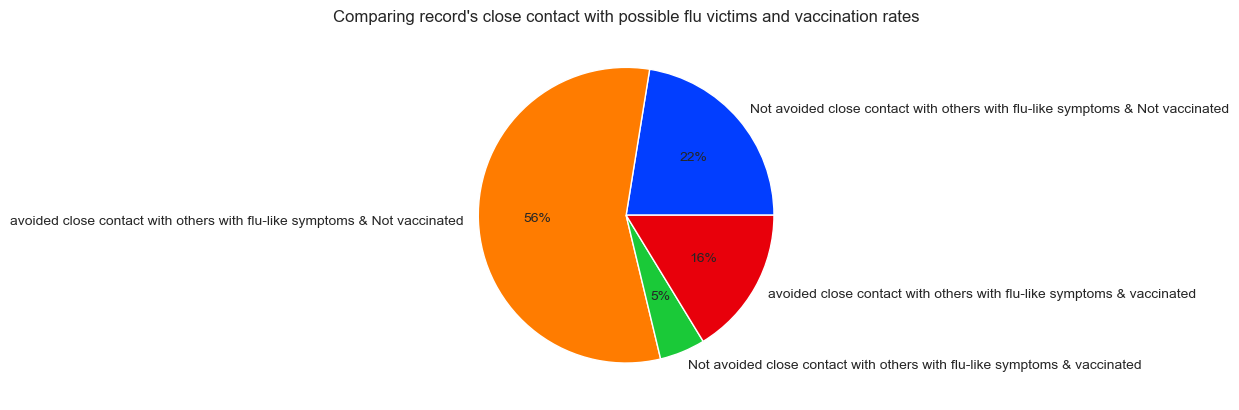

In [67]:
q2df = narrow_df.copy()
avoidance_df = q2df[['h1n1_vaccine', 'behavioral_avoidance']]

#First I reshape the dataframe into 2 groups with the size function to get the total people in each group
#count is used for the total number of records

grouped3 = avoidance_df.groupby(['h1n1_vaccine', 'behavioral_avoidance']).size().reset_index(name='count') 



labs = ['Not avoided close contact with others with flu-like symptoms & Not vaccinated','avoided close contact with others with flu-like symptoms & Not vaccinated','Not avoided close contact with others with flu-like symptoms & vaccinated','avoided close contact with others with flu-like symptoms & vaccinated']

plt.pie(grouped3['count'], labels=labs, colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.title("Comparing record's close contact with possible flu victims and vaccination rates")

   behavioral_large_gatherings  h1n1_vaccine  count
0                          0.0             0  13562
1                          0.0             1   3539
2                          1.0             0   7436
3                          1.0             1   2127


Text(0.5, 1.0, 'Comparing reduced time at large gatherings with h1n1 vaccination rates')

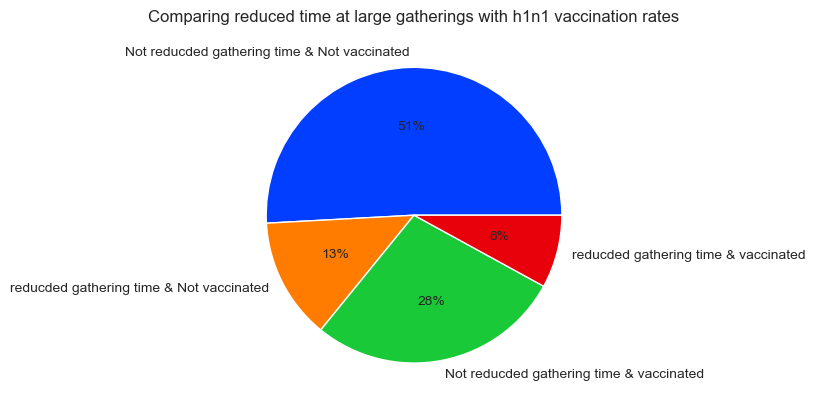

In [68]:
gatherings_df = q2df[['h1n1_vaccine', 'behavioral_large_gatherings']]

#First I reshape the dataframe into 2 groups with the size function to get the total people in each group
#count is used for the total number of records

grouped4 = gatherings_df.groupby(['behavioral_large_gatherings', 'h1n1_vaccine']).size().reset_index(name='count') 
print(grouped4)

labs = ['Not reducded gathering time & Not vaccinated','reducded gathering time & Not vaccinated','Not reducded gathering time & vaccinated','reducded gathering time & vaccinated']

plt.pie(grouped4['count'], labels=labs, colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.title('Comparing reduced time at large gatherings with h1n1 vaccination rates')

### Question 3

In [69]:
#Exploring opinions on risk of getting the seasonal flu and vaccine effectiveness
q3df = narrow_df.copy()

#First I narrow down my dataframes more to create seperate ones for risk of getting the flue and vaccine effectiveness
q3a1 = q3df[['seasonal_vaccine','opinion_seas_vacc_effective']]
q3a2 = q3df[['seasonal_vaccine','opinion_seas_risk']]



#Next I regroup the dataframes
gr5a = q3a1.groupby(['seasonal_vaccine', 'opinion_seas_vacc_effective']).size().reset_index(name='count') 
gr5b = q3a2.groupby(['seasonal_vaccine', 'opinion_seas_risk']).size().reset_index(name='count') 


#Exploring opinions on risk of getting the h1n1 flu and vaccine effectiveness



q3df = narrow_df.copy()

#First I narrow down my dataframes more to create seperate ones for risk of getting the flue and vaccine effectiveness
q3b1 = q3df[['h1n1_vaccine','opinion_h1n1_vacc_effective']]
q3b2 = q3df[['h1n1_vaccine','opinion_h1n1_risk']]



#Next I regroup the dataframes
gr5c = q3b1.groupby(['h1n1_vaccine','opinion_h1n1_vacc_effective']).size().reset_index(name='count') 
gr5d = q3b2.groupby(['h1n1_vaccine','opinion_h1n1_risk']).size().reset_index(name='count') 



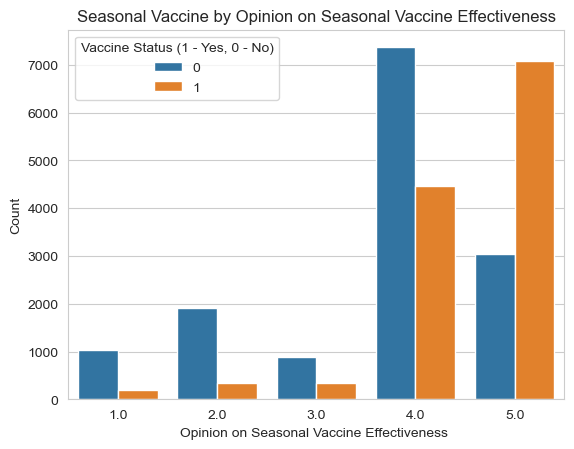

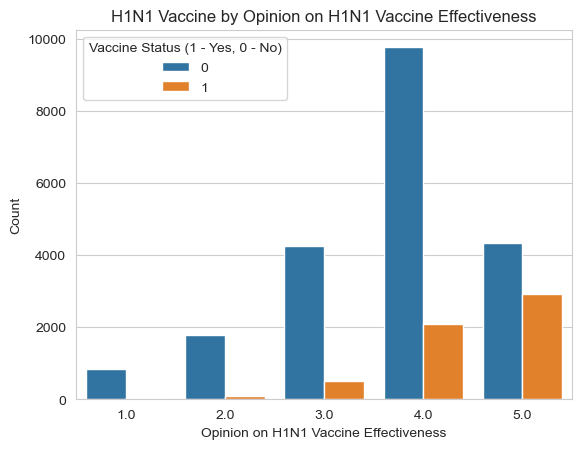

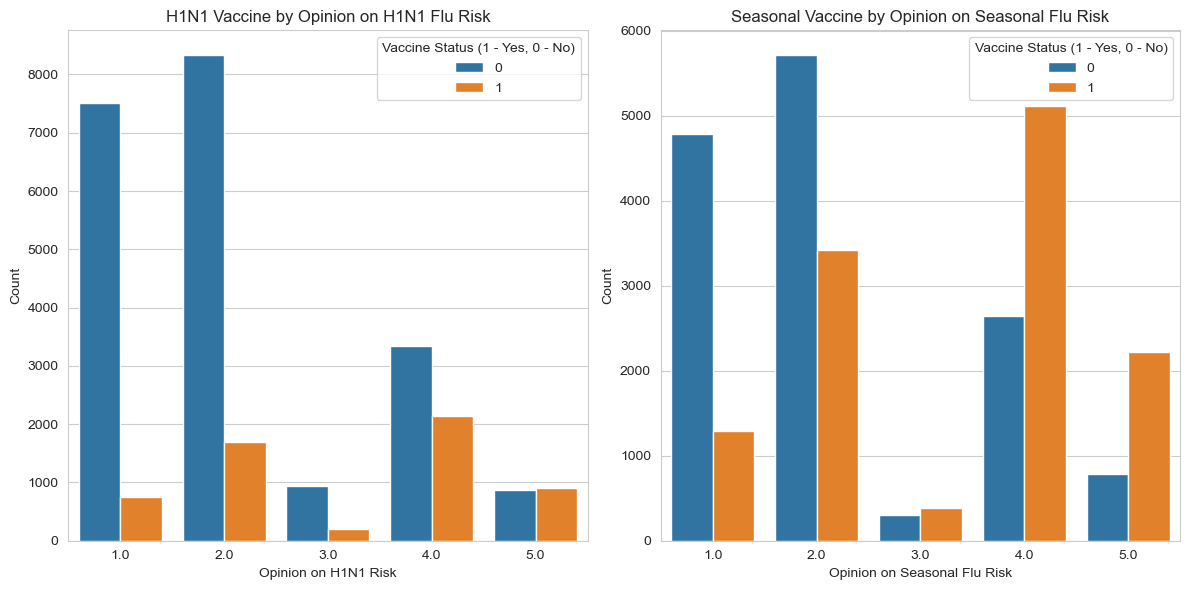

In [70]:
#Now to visualise the data



#creating barplot showing seas effectiveness against vaccination status

# Set the style of the plot
sns.set_style('whitegrid')

# Create the stacked bar chart
sns.barplot(data=gr5a, x='opinion_seas_vacc_effective', y='count', hue='seasonal_vaccine')

# Add labels
plt.xlabel('Opinion on Seasonal Vaccine Effectiveness ')
plt.ylabel('Count')
plt.title('Seasonal Vaccine by Opinion on Seasonal Vaccine Effectiveness')
# Create the legend with 1 and 0 explanation
plt.legend(title='Vaccine Status (1 - Yes, 0 - No)', loc=0)

plt.show()


#creating barplot showing seas risk against vaccination status

#creating barplot showing h1n1 effectiveness against vaccination status

# Set the style of the plot
sns.set_style('whitegrid')

# Create the stacked bar chart
sns.barplot(data=gr5c, x='opinion_h1n1_vacc_effective', y='count', hue='h1n1_vaccine')

# Add labels
plt.xlabel('Opinion on H1N1 Vaccine Effectiveness')
plt.ylabel('Count')
plt.title('H1N1 Vaccine by Opinion on H1N1 Vaccine Effectiveness')
# Create the legend with 1 and 0 explanation
plt.legend(title='Vaccine Status (1 - Yes, 0 - No)', loc=0)

plt.show()



ig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the width and height as desired

# Plot 1: H1N1 Vaccine by Opinion on H1N1 Flu Risk
sns.barplot(data=gr5d, x='opinion_h1n1_risk', y='count', hue='h1n1_vaccine', ax=axes[0])
axes[0].set_xlabel('Opinion on H1N1 Risk')
axes[0].set_ylabel('Count')
axes[0].set_title('H1N1 Vaccine by Opinion on H1N1 Flu Risk')
axes[0].legend(title='Vaccine Status (1 - Yes, 0 - No)', loc=0)

# Plot 2: Seasonal Vaccine by Opinion on Seasonal Flu Risk
sns.barplot(data=gr5b, x='opinion_seas_risk', y='count', hue='seasonal_vaccine', ax=axes[1])
axes[1].set_xlabel('Opinion on Seasonal Flu Risk')
axes[1].set_ylabel('Count')
axes[1].set_title('Seasonal Vaccine by Opinion on Seasonal Flu Risk')
axes[1].legend(title='Vaccine Status (1 - Yes, 0 - No)', loc=0)

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplot
plt.show()









### Xiaonan's Analysis

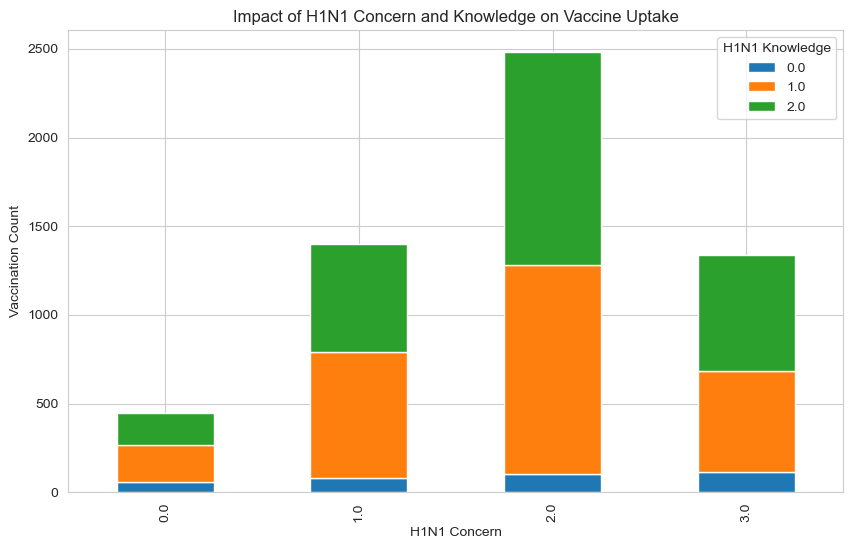

In [73]:
#Load the dataset
xia_df = pd.read_csv('data/cleaned_flushot_hdimputation.csv')

# Group the data by H1N1 concern and knowledge and calculate the vaccination counts
grouped_data = xia_df.groupby(['h1n1_concern','h1n1_knowledge'])['h1n1_vaccine'].sum().unstack()

# Plot the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

 

# Set the labels and title
plt.xlabel('H1N1 Concern')
plt.ylabel('Vaccination Count')
plt.title('Impact of H1N1 Concern and Knowledge on Vaccine Uptake')

 

# Display the legend
plt.legend(title='H1N1 Knowledge')

 

# Show the plot
plt.show()



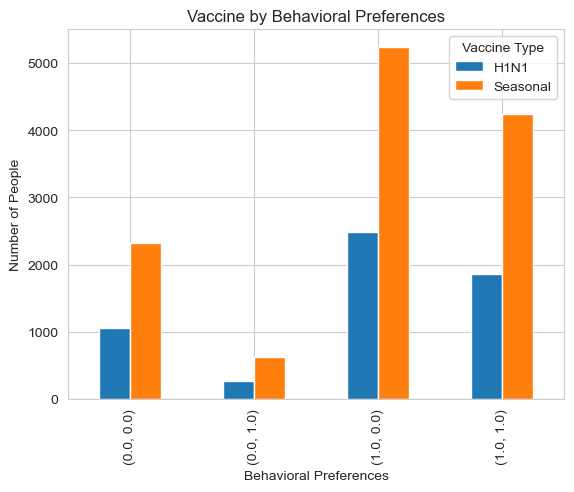

In [74]:
#Question 2- Grouped bar plot - Xiaonan 
# Perform aggregation calculations for 'behavioral_avoidance' and 'behavioral_large_gatherings'
grouped_data = xia_df.groupby(['behavioral_avoidance', 'behavioral_large_gatherings'])[['h1n1_vaccine', 'seasonal_vaccine']].sum()

#Draw the Grouped bar plot
grouped_data.plot(kind='bar')
plt.title('Vaccine by Behavioral Preferences')
plt.xlabel('Behavioral Preferences')
plt.ylabel('Number of People')
plt.legend(title='Vaccine Type', labels=['H1N1', 'Seasonal'])
plt.show()

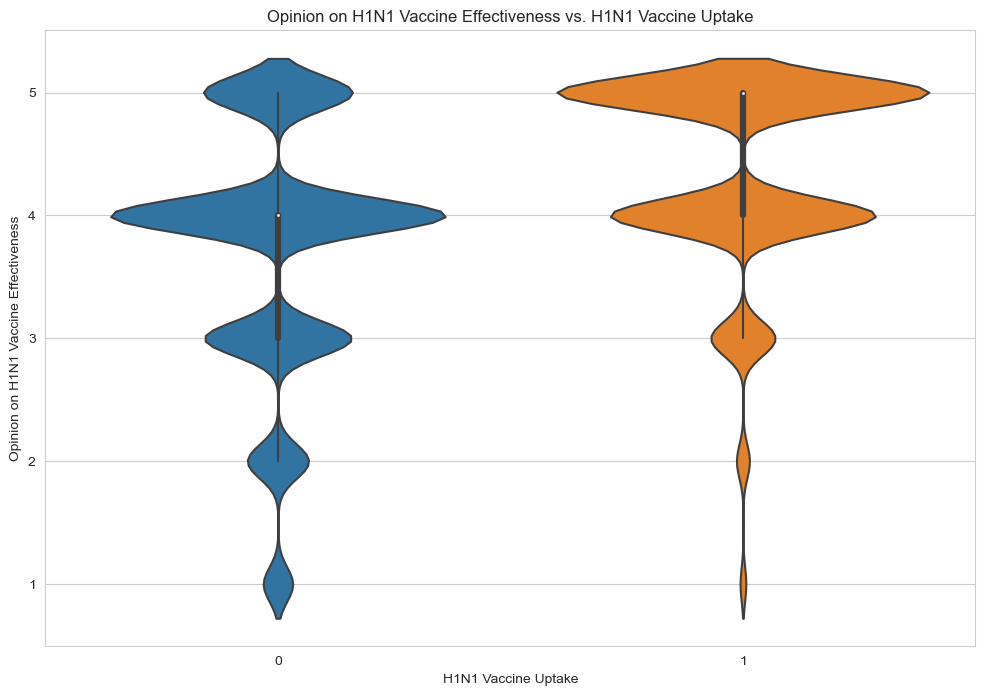

In [75]:
#Question 3- violin plot - Xiaonan 
# Select the variables to be studied
variables = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'h1n1_vaccine', 'seasonal_vaccine']
df_selected = xia_df[variables]

#plot the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='h1n1_vaccine', y='opinion_h1n1_vacc_effective', data=df_selected,  split=True)
plt.title('Opinion on H1N1 Vaccine Effectiveness vs. H1N1 Vaccine Uptake')
plt.xlabel('H1N1 Vaccine Uptake')
plt.ylabel('Opinion on H1N1 Vaccine Effectiveness')

plt.show()
#The above code will generate a violin plot showing the relationship between individual views of H1N1 vaccine effectiveness 
#and H1N1 vaccination status, while using seasonal influenza vaccination status as a different color for the legend.

# Classification

- How do levels of concern and knowledge about the H1N1 flu influence the likelihood of receiving the H1N1 vaccine?

- How do different behavioural factors, such as avoidance of close contact or reduced time at large gatherings, relate to the likelihood of receiving the H1N1 and seasonal flu vaccines?

- Does the perceived effectiveness and risk of getting the H1N1 and seasonal flu vaccines impact an individual's likelihood of getting vaccinated?


Ibrahim - 

Xiaonan - Decision Tree Classification


In [76]:
#Ibrahim
#Import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#We need to ensure the data is split the same for both classification methods therefore comparison is valid (same test size and random state). - Ibrahim


cleaned_df = pd.read_csv('data/cleaned_flushot_hdimputation.csv')
#removes extra index
cleaned_df= cleaned_df.drop("Unnamed: 0", axis=1)



# Split the cleaned df into features (X) and targets (y1, y2)
X = cleaned_df.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)  # Features (all columns except the target variables)

# h1n1 target variable
y1 = cleaned_df['h1n1_vaccine']  
# seasonal target variable
y2 = cleaned_df['seasonal_vaccine']  

# Apply the train-test split for the h1n1 target variable
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.3, random_state=18)

# Apply the train-test split for the seasonal target variable
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.3, random_state=18)




## Logistic Regression - Ibrahim

### Question 1 -How do levels of concern and knowledge about the H1N1 flu influence the likelihood of receiving the H1N1 vaccine?



In [77]:
#Q1

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



#Firstly I will need to encode for logistic regression on train and test data

#Here I narrow down the training data frame to the two variables I am investigating
X_train_q1 = X_train1[['h1n1_concern','h1n1_knowledge']]
X_test_q1 = X_test1[['h1n1_concern','h1n1_knowledge']]


#Here I use one hot encoding
X_train_q1 = pd.get_dummies(X_train_q1, columns=['h1n1_concern','h1n1_knowledge'])
X_test_q1 = pd.get_dummies(X_test_q1, columns=['h1n1_concern','h1n1_knowledge'])


# Fit logistic regression - training
logreg = LogisticRegression()
logreg.fit(X_train_q1, y_train1)


#Predicting - on Testing data
q1_y_pred = logreg.predict(X_test_q1)

#Measure the accuracy
accuracy = accuracy_score(y_test1, q1_y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)


report = classification_report(y_test1, q1_y_pred)

# Print the classification report
print(report)


Accuracy: 0.789125
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6313
           1       0.00      0.00      0.00      1687

    accuracy                           0.79      8000
   macro avg       0.39      0.50      0.44      8000
weighted avg       0.62      0.79      0.70      8000



/Users/ibs/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ibs/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ibs/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.4687711  -0.18988067  0.15941061  0.49875324 -0.35909003 -0.10275529
  0.46135741]
Coefficient for h1n1_concern_0: -0.468771096651342
Coefficient for h1n1_concern_1: -0.1898806717806344
Coefficient for h1n1_concern_2: 0.15941061473945997
Coefficient for h1n1_concern_3: 0.4987532401089927
Coefficient for h1n1_knowledge_0: -0.35909002906328824
Coefficient for h1n1_knowledge_1: -0.10275529113457549
Coefficient for h1n1_knowledge_2: 0.46135740661253155


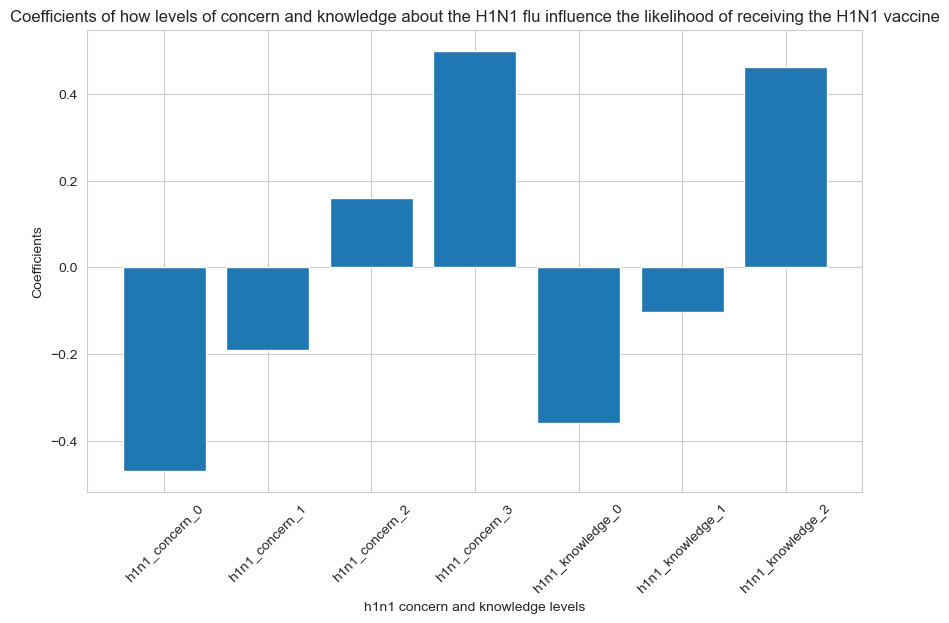

In [78]:
# Print the logistic regression coefficients for each value
coefficients = logreg.coef_[0]
print(coefficients)

# Interpret the coefficients
categorical_vars = ['h1n1_concern_0', 'h1n1_concern_1', 'h1n1_concern_2', 'h1n1_concern_3',
                    'h1n1_knowledge_0', 'h1n1_knowledge_1', 'h1n1_knowledge_2']

# Print the logistic regression coefficients for each value with their label
for i in range(len(categorical_vars)):
    var = categorical_vars[i]
    print(f"Coefficient for {var}: {coefficients[i]}")
    
    
# Create a DataFrame to store the coefficients and their corresponding labels
q1_coeff_df = pd.DataFrame({'Categorical Variable': categorical_vars, 'Coefficient': coefficients})
q1_coeff_df

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(q1_coeff_df['Categorical Variable'], q1_coeff_df['Coefficient'])
plt.xlabel('h1n1 concern and knowledge levels')
plt.ylabel('Coefficients')
plt.title('Coefficients of how levels of concern and knowledge about the H1N1 flu influence the likelihood of receiving the H1N1 vaccine')
plt.xticks(rotation=45)
plt.show()

### Question 2 - How do different behavioural factors, such as avoidance of close contact or reduced time at large gatherings, relate to the likelihood of receiving the H1N1 and seasonal flu vaccines?



In [79]:
#Firstly I will need to encode for logistic regression on train and test data

#Here I narrow down the training data frame to the two variables I am investigating - one for each vaccine
X_train_q2h = X_train1[['behavioral_avoidance','behavioral_large_gatherings']]
X_test_q2h = X_test1[['behavioral_avoidance','behavioral_large_gatherings']]

X_train_q2s = X_train2[['behavioral_avoidance','behavioral_large_gatherings']]
X_test_q2s = X_test2[['behavioral_avoidance','behavioral_large_gatherings']]



# Fit logistic regression - training
#h1n1
logreg_h1 = LogisticRegression()
logreg_h1.fit(X_train_q2h, y_train1)
#seasonal
logreg_se = LogisticRegression()
logreg_se.fit(X_train_q2s, y_train2)


#Predicting - on Testing data
q2_pred_h1n1 = logreg_h1.predict(X_test_q2h)
q2_pred_seas = logreg_se.predict(X_test_q2s)



#Measure the accuracy
accuracy_h1n1 = accuracy_score(y_test1, q2_pred_h1n1)
accuracy_seas = accuracy_score(y_test2, q2_pred_seas)


# Print the accuracy score
print("H1N1 Accuracy:", accuracy_h1n1, " Seasonal Accuracy: ",accuracy_seas)


report_h1n1 = classification_report(y_test1, q2_pred_h1n1)
report_seas = classification_report(y_test1, q2_pred_seas)

# Print the classification report
print("H1N1: ",report_h1n1 )

print("Seasonal: ",report_seas )

H1N1 Accuracy: 0.789125  Seasonal Accuracy:  0.5415
H1N1:                precision    recall  f1-score   support

           0       0.79      1.00      0.88      6313
           1       0.00      0.00      0.00      1687

    accuracy                           0.79      8000
   macro avg       0.39      0.50      0.44      8000
weighted avg       0.62      0.79      0.70      8000

Seasonal:                precision    recall  f1-score   support

           0       0.79      0.69      0.74      6313
           1       0.22      0.32      0.26      1687

    accuracy                           0.61      8000
   macro avg       0.50      0.51      0.50      8000
weighted avg       0.67      0.61      0.64      8000



/Users/ibs/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ibs/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ibs/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


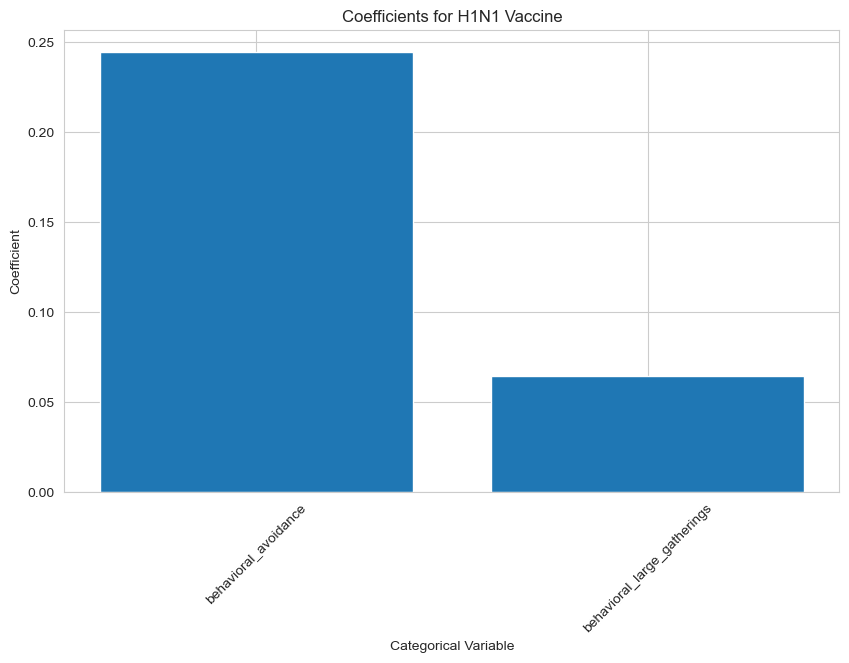

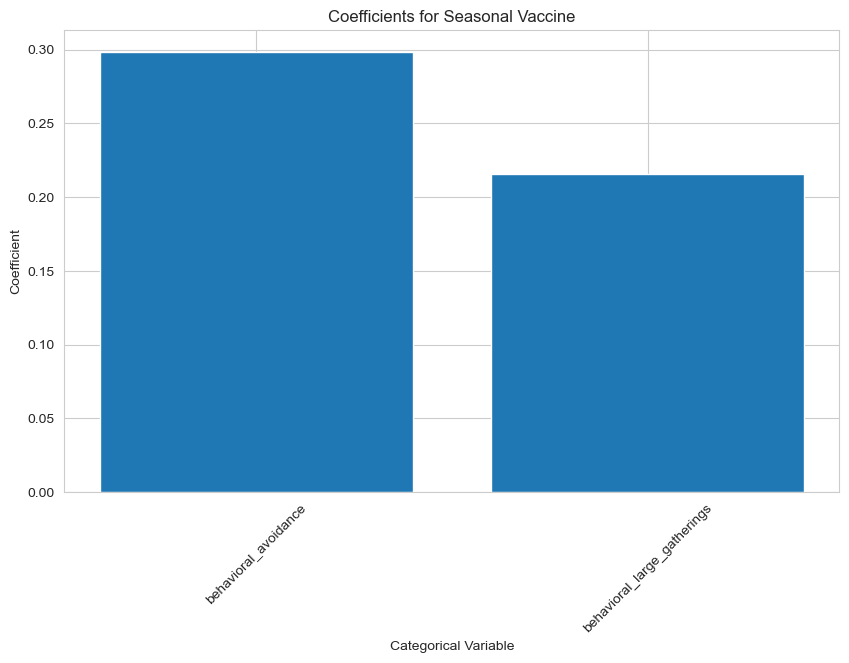

In [80]:
#Visualise coefficients

#get coefficient for each group
coefficients_h1n1 = logreg_h1.coef_[0]
coefficients_seas = logreg_se.coef_[0]

# Identify the categorical variables
categorical_vars = ['behavioral_avoidance', 'behavioral_large_gatherings']

# Create DataFrames to store the coefficients and their corresponding labels
coeff_df_h1n1 = pd.DataFrame({'Categorical Variable': categorical_vars, 'Coefficient': coefficients_h1n1})
coeff_df_seas = pd.DataFrame({'Categorical Variable': categorical_vars, 'Coefficient': coefficients_seas})

# Plot the coefficients for H1N1 vaccine
plt.figure(figsize=(10, 6))
plt.bar(coeff_df_h1n1['Categorical Variable'], coeff_df_h1n1['Coefficient'])
plt.xlabel('Categorical Variable')
plt.ylabel('Coefficient')
plt.title('Coefficients for H1N1 Vaccine')
plt.xticks(rotation=45)
plt.show()

# Plot the coefficients for seasonal vaccine
plt.figure(figsize=(10, 6))
plt.bar(coeff_df_seas['Categorical Variable'], coeff_df_seas['Coefficient'])
plt.xlabel('Categorical Variable')
plt.ylabel('Coefficient')
plt.title('Coefficients for Seasonal Vaccine')
plt.xticks(rotation=45)
plt.show()


### Question 3 - Does the perceived effectiveness and risk of getting the H1N1 and seasonal flu vaccines impact an individual's likelihood of getting vaccinated?



In [81]:


#Firstly I will need to encode for logistic regression on train and test data

#Here I narrow down the training data frame to the two variables I am investigating - one for each vaccine
X_train_q3h = X_train1[['opinion_h1n1_vacc_effective','opinion_h1n1_risk']]
X_test_q3h = X_test1[['opinion_h1n1_vacc_effective','opinion_h1n1_risk']]

X_train_q3s = X_train2[['opinion_seas_vacc_effective','opinion_seas_risk']]
X_test_q3s = X_test2[['opinion_seas_vacc_effective','opinion_seas_risk']]

#Here I use one hot encoding
X_train_q3h = pd.get_dummies(X_train_q3h, columns=['opinion_h1n1_vacc_effective','opinion_h1n1_risk'])
X_test_q3h = pd.get_dummies(X_test_q3h, columns=['opinion_h1n1_vacc_effective','opinion_h1n1_risk'])

X_train_q3s = pd.get_dummies(X_train_q3s, columns=['opinion_seas_vacc_effective','opinion_seas_risk'])
X_test_q3s = pd.get_dummies(X_test_q3s, columns=['opinion_seas_vacc_effective','opinion_seas_risk'])


# Fit logistic regression - training
#h1n1
logreg_h1_2 = LogisticRegression()
logreg_h1_2.fit(X_train_q3h, y_train1)
#seasonal
logreg_se_2 = LogisticRegression()
logreg_se_2.fit(X_train_q3s, y_train2)


#Predicting - on Testing data
q3_pred_h1n1 = logreg_h1_2.predict(X_test_q3h)
q3_pred_seas = logreg_se_2.predict(X_test_q3s)



#Measure the accuracy
accuracy_h1n1 = accuracy_score(y_test1, q3_pred_h1n1)
accuracy_seas = accuracy_score(y_test2, q3_pred_seas)


# Print the accuracy score
print("H1N1 Accuracy:", accuracy_h1n1, " Seasonal Accuracy: ",accuracy_seas)


report_h1n1 = classification_report(y_test1, q3_pred_h1n1)
report_seas = classification_report(y_test1, q3_pred_seas)

# Print the classification report
print("H1N1: ",report_h1n1 )

print("Seasonal: ",report_seas )

H1N1 Accuracy: 0.805125  Seasonal Accuracy:  0.710875
H1N1:                precision    recall  f1-score   support

           0       0.84      0.93      0.88      6313
           1       0.56      0.33      0.42      1687

    accuracy                           0.81      8000
   macro avg       0.70      0.63      0.65      8000
weighted avg       0.78      0.81      0.78      8000

Seasonal:                precision    recall  f1-score   support

           0       0.89      0.58      0.70      6313
           1       0.31      0.72      0.44      1687

    accuracy                           0.61      8000
   macro avg       0.60      0.65      0.57      8000
weighted avg       0.76      0.61      0.64      8000



Coefficient for opinion_h1n1_vacc_effective_1: -0.9347573871941964
Coefficient for opinion_h1n1_vacc_effective_2: -0.6165008407803052
Coefficient for opinion_h1n1_vacc_effective_3: -0.12012205098367623
Coefficient for opinion_h1n1_vacc_effective_4: 0.35181463090108406
Coefficient for opinion_h1n1_vacc_effective_5: 1.319567076447002
Coefficient for opinion_h1n1_risk_1: -1.003467988259125
Coefficient for opinion_h1n1_risk_2: -0.39657603975423744
Coefficient for opinion_h1n1_risk_3: -0.0966432456558703
Coefficient for opinion_h1n1_risk_4: 0.5621498046680767
Coefficient for opinion_h1n1_risk_5: 0.934538897389689
Coefficient for opinion_seas_vacc_effective_1: -0.5629300723050501
Coefficient for opinion_seas_vacc_effective_2: -0.7977423205361148
Coefficient for opinion_seas_vacc_effective_3: -0.12817760546691281
Coefficient for opinion_seas_vacc_effective_4: 0.1766917447923969
Coefficient for opinion_seas_vacc_effective_5: 1.3122968084300812
Coefficient for opinion_seas_risk_1: -1.1298964135

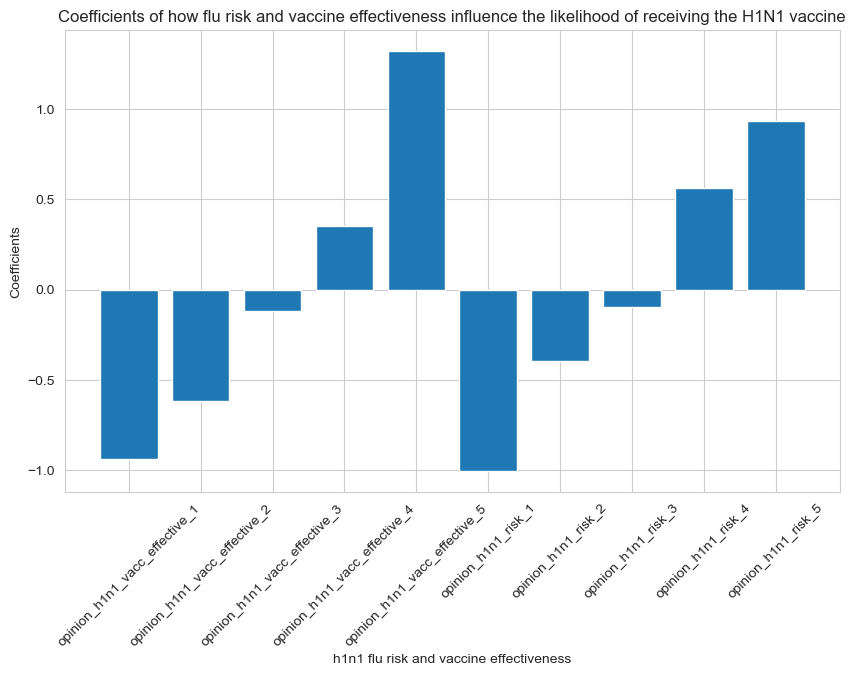

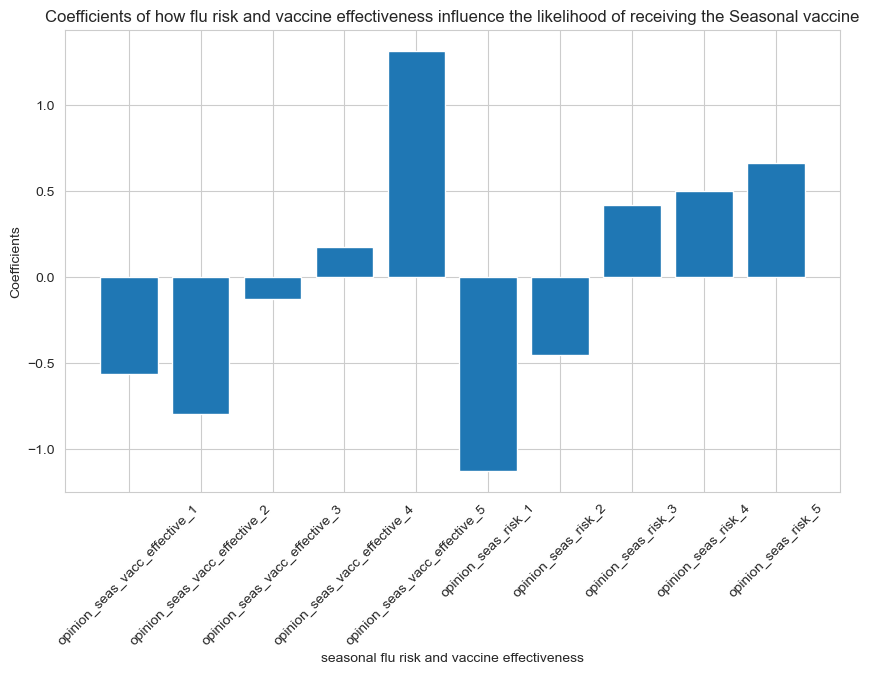

In [83]:
# Obtain the coefficients
coefficients_h1n1 = logreg_h1_2.coef_[0]
coefficients_seas = logreg_se_2.coef_[0]



# Interpret the coefficients
categorical_vars_h1 = ['opinion_h1n1_vacc_effective_1', 'opinion_h1n1_vacc_effective_2', 'opinion_h1n1_vacc_effective_3', 'opinion_h1n1_vacc_effective_4', 'opinion_h1n1_vacc_effective_5',
                       'opinion_h1n1_risk_1', 'opinion_h1n1_risk_2', 'opinion_h1n1_risk_3', 'opinion_h1n1_risk_4', 'opinion_h1n1_risk_5']

categorical_vars_seas = ['opinion_seas_vacc_effective_1', 'opinion_seas_vacc_effective_2', 'opinion_seas_vacc_effective_3', 'opinion_seas_vacc_effective_4', 'opinion_seas_vacc_effective_5',
                         'opinion_seas_risk_1', 'opinion_seas_risk_2', 'opinion_seas_risk_3', 'opinion_seas_risk_4', 'opinion_seas_risk_5']

# Print the logistic regression coefficients for each value with their label
for i in range(len(categorical_vars_h1)):
    var = categorical_vars_h1[i]
    print(f"Coefficient for {var}: {coefficients_h1n1[i]}")
    
for i in range(len(categorical_vars_seas)):
    var = categorical_vars_seas[i]
    print(f"Coefficient for {var}: {coefficients_seas[i]}")

    
# Create a DataFrame to store the coefficients and their corresponding labels
q1_coeff_df_h1 = pd.DataFrame({'Categorical Variable': categorical_vars_h1, 'Coefficient': coefficients_h1n1})


q1_coeff_df_se = pd.DataFrame({'Categorical Variable': categorical_vars_seas, 'Coefficient': coefficients_seas})

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(q1_coeff_df_h1['Categorical Variable'], q1_coeff_df_h1['Coefficient'])
plt.xlabel('h1n1 flu risk and vaccine effectiveness')
plt.ylabel('Coefficients')
plt.title('Coefficients of how flu risk and vaccine effectiveness influence the likelihood of receiving the H1N1 vaccine')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(q1_coeff_df_se['Categorical Variable'], q1_coeff_df_se['Coefficient'])
plt.xlabel('seasonal flu risk and vaccine effectiveness')
plt.ylabel('Coefficients')
plt.title('Coefficients of how flu risk and vaccine effectiveness influence the likelihood of receiving the Seasonal vaccine')
plt.xticks(rotation=45)
plt.show()



## Decision Tree Classifier - Xiaonan 

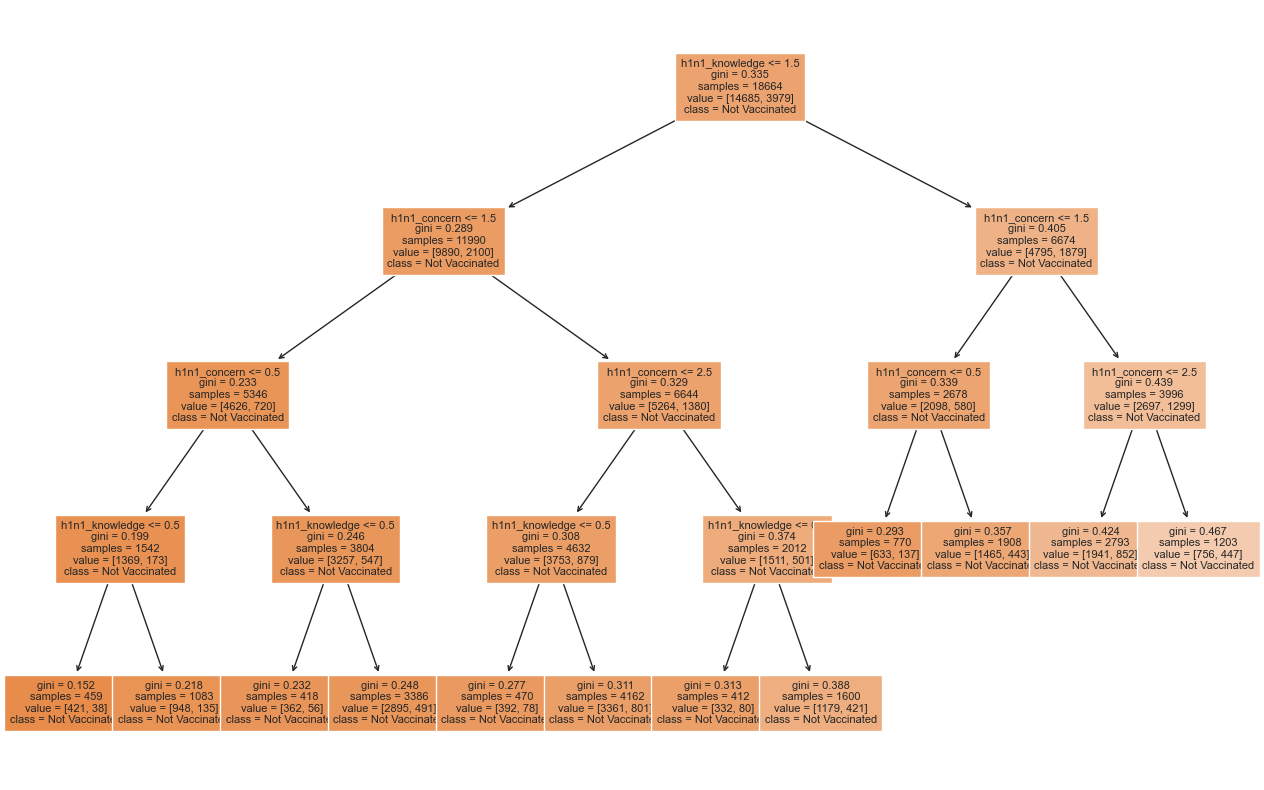

Accuracy: 0.789125
Precision: 1.0
Recall: 0.0


In [84]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('data/cleaned_flushot_hdimputation.csv')

# Extraction of features and target variables
X = df[['h1n1_concern', 'h1n1_knowledge']].copy()
y = df['h1n1_vaccine']

# Coding categorical variables as values
label_encoder = LabelEncoder()
X['h1n1_concern'] = label_encoder.fit_transform(X['h1n1_concern'])
X['h1n1_knowledge'] = label_encoder.fit_transform(X['h1n1_knowledge'])

# Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

# Create a decision tree classifier
classifier = DecisionTreeClassifier()

# Fitting the model
classifier.fit(X_train, y_train)

# Set figure size
plt.figure(figsize=(16, 10))

# Plot decision tree
plot_tree(classifier, feature_names=X.columns, class_names=['Not Vaccinated', 'Vaccinated'], filled=True, fontsize=8)

# Show plot
plt.show()

# Predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', zero_division=1)
recall = recall_score(y_test, y_pred, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.459
Precision: 0.5095238095238095
Recall: 0.23764575235980012


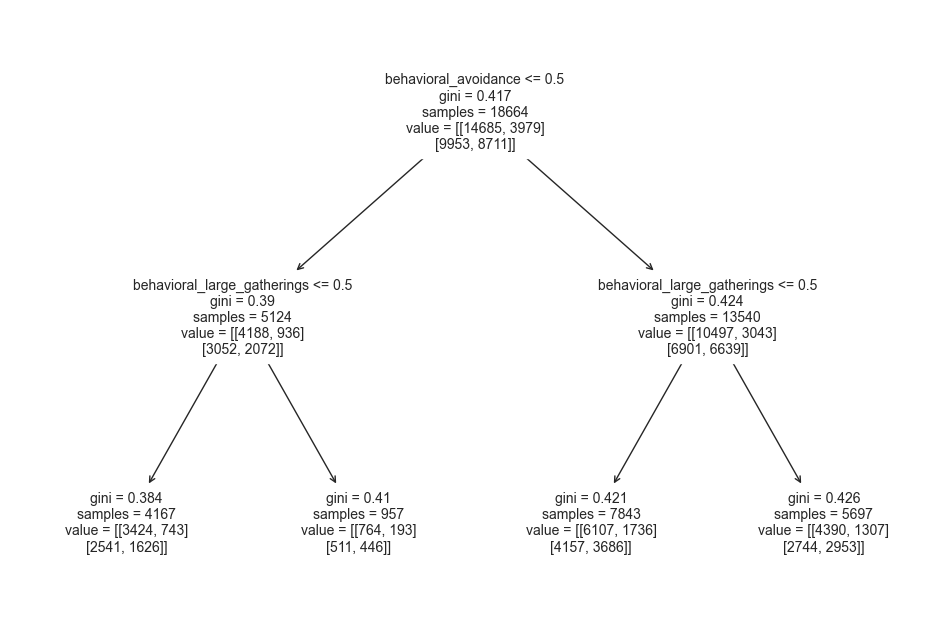

In [85]:
#Question 2 - Decision tree classifier - Xiaonan 
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = pd.read_csv('data/cleaned_flushot_hdimputation.csv')

# Extraction of features and target variables
X = df[['behavioral_avoidance', 'behavioral_large_gatherings']].copy()
y = df[['h1n1_vaccine', 'seasonal_vaccine']].copy()

# Coding categorical variables as values
label_encoder = LabelEncoder()
X.loc[:, 'behavioral_avoidance'] = label_encoder.fit_transform(X['behavioral_avoidance'])
X.loc[:, 'behavioral_large_gatherings'] = label_encoder.fit_transform(X['behavioral_large_gatherings'])

# Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

# Create a decision tree classifier
classifier = DecisionTreeClassifier()

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = classifier.predict(X_test)

# Calculating model performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

# Draw tree
plt.figure(figsize=(12, 8))
tree.plot_tree(classifier, feature_names=X.columns, class_names=['Not Vaccinated', 'Vaccinated'])
plt.show()



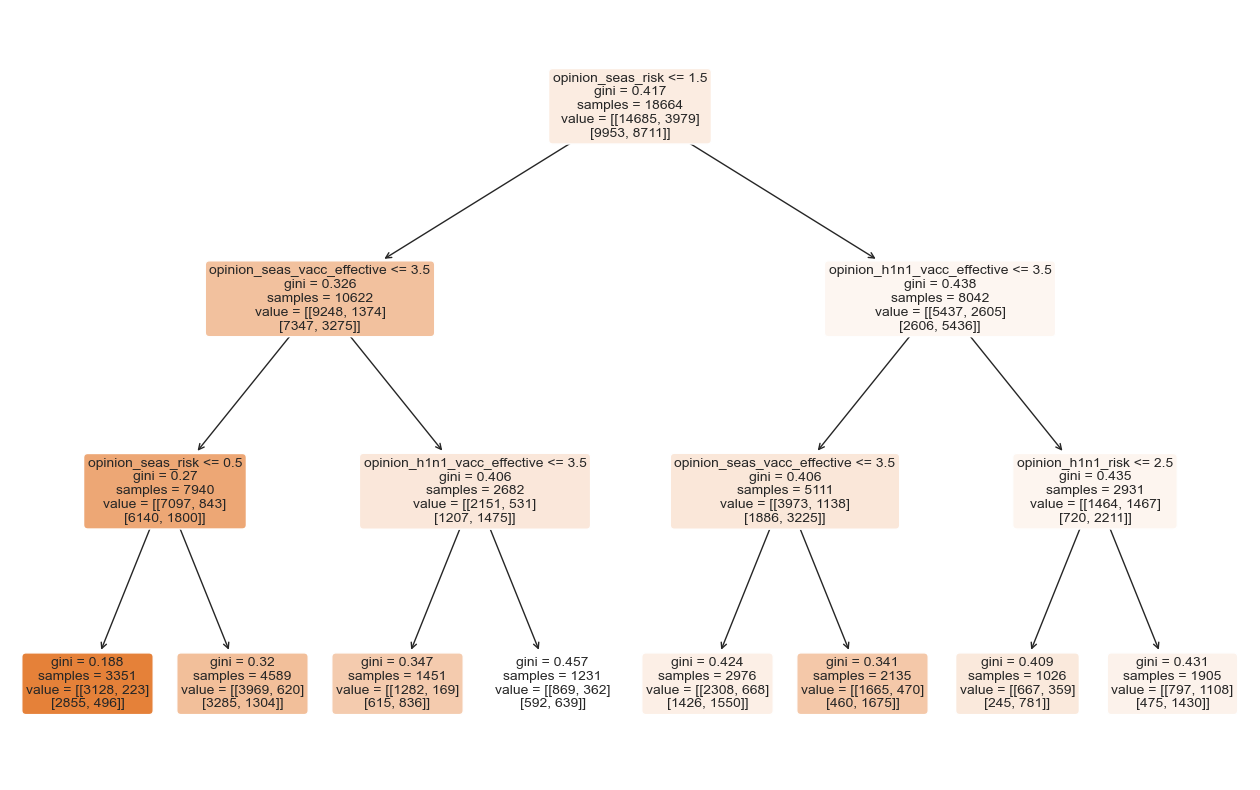

Accuracy: 0.565875
Precision: 0.6300440205429201
Recall: 0.6357579122709606


In [86]:
#Question 3 - Decision tree classifier - Xiaonan 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

df = pd.read_csv('data/cleaned_flushot_hdimputation.csv')

# Extraction of features and target variables
X = df[['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk']].copy()
y = df[['h1n1_vaccine', 'seasonal_vaccine']].copy()

# Coding categorical variables as values
label_encoder = LabelEncoder()
X.loc[:, 'opinion_h1n1_vacc_effective'] = label_encoder.fit_transform(X['opinion_h1n1_vacc_effective'])
X.loc[:, 'opinion_h1n1_risk'] = label_encoder.fit_transform(X['opinion_h1n1_risk'])
X.loc[:, 'opinion_seas_vacc_effective'] = label_encoder.fit_transform(X['opinion_seas_vacc_effective'])
X.loc[:, 'opinion_seas_risk'] = label_encoder.fit_transform(X['opinion_seas_risk'])

# Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

# Create a decision tree classifier and set the maximum depth and the minimum number of samples of leaf nodes
classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Fitting the model
classifier.fit(X_train, y_train)

# Draw decision trees
plt.figure(figsize=(16, 10))
tree.plot_tree(classifier, feature_names=X.columns, class_names=['Not Vaccinated', 'Vaccinated'], filled=True,
               rounded=True, fontsize=10)
plt.show()

# Predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy, precision and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)



